In [1]:
import numpy as np

In [2]:
def generate_accepted_strings(max_length):
    """
    Generate all accepted strings (sequences of actions) for the prisoner's dilemma automaton
    with a grim trigger strategy up to a specified length.

    :param max_length: Maximum length of action sequences to generate.
    :return: Set of all accepted strings up to max_length.
    """
    accepted_strings = set()
    current_states = ['w_EE']

    for _ in range(max_length):
        next_states = []
        for state in current_states:
            if state == 'w_EE':
                # In w_EE, can stay in w_EE with 'EE' or move to w_SS with any other action
                next_states.append('w_EE')
                next_states.append('w_SS')
            elif state == 'w_SS':
                # In w_SS, stays in w_SS with any action
                next_states.append('w_SS')

        # Update the current states and add them to the accepted strings
        current_states = next_states
        accepted_strings.update(current_states)

    return accepted_strings

# Example usage
accepted_strings = generate_accepted_strings(5)  # Generate sequences up to length 3
accepted_strings

def generate_accepted_strings_with_forgiveness(max_length):
    """
    Generate all accepted strings (sequences of actions) for the modified prisoner's dilemma automaton
    with a possibility of forgiveness. In this scenario, if 'EE' is played in 'w_SS', 
    they can transition back to 'w_EE'.

    :param max_length: Maximum length of action sequences to generate.
    :return: Set of all accepted strings up to max_length.
    """
    accepted_strings = set()
    current_states = [('w_EE', '')]  # State and the path taken to reach that state

    for _ in range(max_length):
        next_states = []
        for state, path in current_states:
            if state == 'w_EE':
                # Stay in w_EE with 'EE' or move to w_SS with any other action
                next_states.append(('w_EE', path + 'EE'))
                next_states.append(('w_SS', path + 'ES'))
                next_states.append(('w_SS', path + 'SE'))
                next_states.append(('w_SS', path + 'SS'))
            elif state == 'w_SS':
                # Stay in w_SS with any action except 'EE', which moves back to w_EE
                next_states.append(('w_SS', path + 'ES'))
                next_states.append(('w_SS', path + 'SE'))
                next_states.append(('w_SS', path + 'SS'))
                next_states.append(('w_EE', path + 'EE'))

        # Update the current states and add the paths to the accepted strings
        current_states = next_states
        accepted_strings.update([path for _, path in current_states])

    return accepted_strings

# Example usage
accepted_strings_with_forgiveness = generate_accepted_strings_with_forgiveness(2)  # Generate sequences up to length 2
accepted_strings_with_forgiveness

import zlib

def compress(data):
    """Compress a set of strings using zlib and return the size of the compressed data."""
    return len(zlib.compress(' '.join(data).encode()))

def normalized_compression_distance(set1, set2):
    """Calculate the Normalized Compression Distance between two sets of strings."""
    c_x = compress(set1)
    c_y = compress(set2)
    c_xy = compress(set1 | set2)  # Union of both sets for combined compression

    return (c_xy - min(c_x, c_y)) / max(c_x, c_y)

# Calculate NCD between the two automata
ncd_value = normalized_compression_distance(accepted_strings, accepted_strings_with_forgiveness)
ncd_value


0.803921568627451

In [12]:
def generate_accepted_strings(max_length):
    """
    Generate all accepted strings (sequences of actions) for the prisoner's dilemma automaton
    with a grim trigger strategy up to a specified length.

    :param max_length: Maximum length of action sequences to generate.
    :return: Set of all accepted strings up to max_length.
    """
    accepted_strings = set()
    current_states = [('w_EE', '')]  # Start with the initial state and empty path

    for _ in range(max_length):
        next_states = []
        for state, path in current_states:
            if state == 'w_EE':
                # In w_EE, can stay in w_EE with 'EE' or move to w_SS with any other action
                next_states.append(('w_EE', path + 'EE'))
                next_states.append(('w_SS', path + 'ES'))
                next_states.append(('w_SS', path + 'SE'))
                next_states.append(('w_SS', path + 'SS'))
            elif state == 'w_SS':
                # In w_SS, stays in w_SS with any action
                next_states.append(('w_SS', path + 'ES'))
                next_states.append(('w_SS', path + 'SE'))
                next_states.append(('w_SS', path + 'SS'))

        # Update the current states and add the paths to the accepted strings
        current_states = next_states
        accepted_strings.update([path for _, path in current_states])

    return accepted_strings

# Generating languages again with updated function
grim_trigger_language = generate_accepted_strings(5)
forgiveness_language = generate_accepted_strings_with_forgiveness(2)

# Display the generated languages
print("Grim Trigger Language up to length 5:")
print(grim_trigger_language)
print("Forgiveness Language up to length 2:")
print(forgiveness_language)


Grim Trigger Language up to length 5:
{'ESESSEES', 'EEEESEESSE', 'ESES', 'EESEESESES', 'EEEESSESES', 'ESSSSEESSS', 'ESSESSSEES', 'EEEEESSESS', 'SESSSSSS', 'SEESSSSSSE', 'EESSSESSSS', 'SSESESES', 'EEEEESSEES', 'SSSSSEES', 'SESSSESEES', 'SESSSSSESE', 'ESESESSSSE', 'SSSESESSSE', 'SESSSSESES', 'SEESSSESES', 'EESESEESSS', 'SEESSEESES', 'EESSSSSSSE', 'SSESSSSSES', 'EEEEESSSSS', 'EEESSESSSS', 'SSSSSEESES', 'SESESSSSSE', 'SEESSESESE', 'EESSESSSSS', 'ESESSSESSE', 'SSESSSSSSE', 'EEEEESES', 'EESEES', 'EESSSESSES', 'ESESSSESES', 'SSSSESSSES', 'EESSESESSE', 'SESSESSSSS', 'EESSSEESES', 'ESSSESSESE', 'EEESSSESES', 'ESESSSSSSE', 'SSSESESE', 'SSSEESSSSS', 'ESSESEESSS', 'ESSSESSE', 'EESESESEES', 'ESSESSESSS', 'EESSESSEES', 'EEEESS', 'ESESSESSSS', 'EEESSESS', 'SEESESESSE', 'SEESESSSSE', 'SESSSSESSE', 'EESSSSESES', 'SSESESSESE', 'SSSSSSSS', 'SEESSSSEES', 'ESSEESSEES', 'ESESSEESSS', 'EESSSEESSS', 'SESEES', 'ESESSSESSS', 'EESSSE', 'ESESSEESSE', 'SSSESSSSSE', 'SSSSSESSES', 'SSSSSSSEES', 'EEEEEEEEES', 'EEEEES

In [3]:
accepted_strings

{'w_EE', 'w_SS'}

In [ ]:
accepted_strings_with_forgiveness

{'EE',
 'EEEE',
 'EEES',
 'EESE',
 'EESS',
 'ES',
 'ESEE',
 'ESES',
 'ESSE',
 'ESSS',
 'SE',
 'SEEE',
 'SEES',
 'SESE',
 'SESS',
 'SS',
 'SSEE',
 'SSES',
 'SSSE',
 'SSSS'}

In [ ]:
c_x = compress(accepted_strings)
c_y = compress(accepted_strings_with_forgiveness)

In [2]:
def always_cooperate(history):
    return 'C'

def always_defect(history):
    return 'D'

def tit_for_tat(history):
    if not history:  # If history is empty, cooperate by default
        return 'C'
    return history[-1]  # Return the opponent's last action

def simulate_game(strategy1, strategy2, rounds=10):
    history1, history2 = [], []
    results1, results2 = [], []

    for _ in range(rounds):
        action1 = strategy1(history2)  # Strategy 1 bases its decision on Strategy 2's history
        action2 = strategy2(history1)  # Strategy 2 bases its decision on Strategy 1's history
        history1.append(action1)
        history2.append(action2)
        results1.append(action1)
        results2.append(action2)

    return results1, results2

strategies = [always_cooperate, always_defect, tit_for_tat]
data = []

for i, strategy1 in enumerate(strategies):
    for j, strategy2 in enumerate(strategies):
        if i <= j:  # To avoid duplicating symmetric matchups
            results1, results2 = simulate_game(strategy1, strategy2, rounds=50)
            data.append(results1)
            data.append(results2)


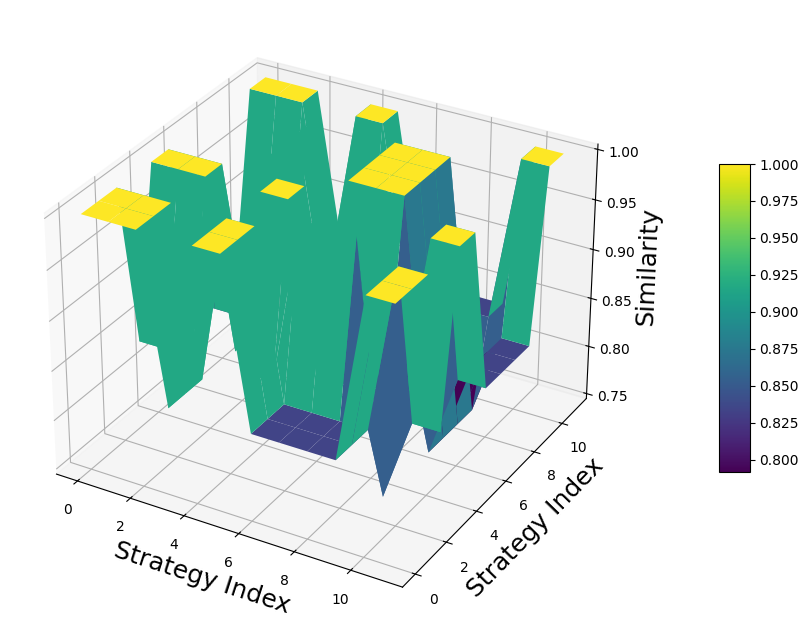

In [5]:
def actions_to_string(actions):
    return ''.join(actions)

import zlib

def compress(data):
    """Compress a set of strings using zlib and return the size of the compressed data."""
    return len(zlib.compress(data.encode('utf-8')))

def normalized_compression_distance(actions1, actions2):
    x = actions_to_string(actions1)
    y = actions_to_string(actions2)
    c_x = compress(x)
    c_y = compress(y)
    c_xy = compress(x + y)  # Combine both strings for combined compression

    return (c_xy - min(c_x, c_y)) / max(c_x, c_y)

ncd_matrix = []
for results1 in data:
    ncd_row = []
    for results2 in data:
        ncd = normalized_compression_distance(results1, results2)
        ncd_row.append(ncd)
    ncd_matrix.append(ncd_row)

import matplotlib.pyplot as plt
import numpy as np
# Assuming 'ncd_matrix' is already populated with the NCD values
import numpy as np

similarity_matrix = 1 - np.array(ncd_matrix)  # Subtract NCD from 1 to invert the scale

x = np.arange(similarity_matrix.shape[0])
y = np.arange(similarity_matrix.shape[1])
X, Y = np.meshgrid(x, y)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, similarity_matrix, cmap='viridis')

# ax.set_title('Peaks and Valleys of Strategy Similarities', fontsize=18)
ax.set_xlabel('Strategy Index', fontsize=18)
ax.set_ylabel('Strategy Index', fontsize=18)
ax.set_zlabel('Similarity', fontsize=18)
fig.colorbar(surface, shrink=0.5, aspect=10, pad=0.1)  # Adjust the pad parameter to move the color bar

plt.show()


In [9]:
ncd_matrix

[[0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0],
 [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0,
  0.0,
  0.25,
  0.16666666666666666,
  0.16666666666666666],
 [0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666

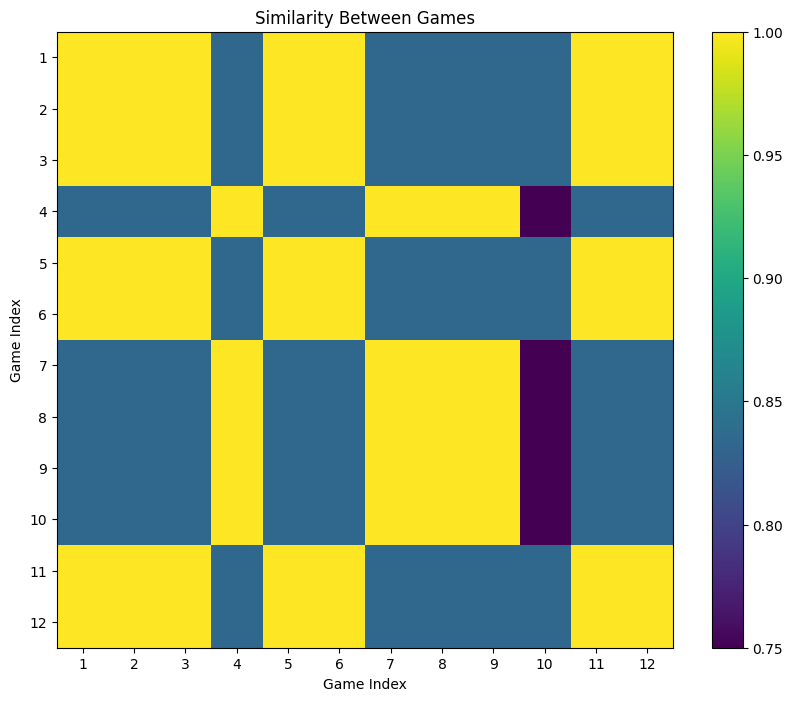

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'similarity_matrix' is already populated with the NCD values converted to similarity
similarity_matrix = 1 - np.array(ncd_matrix)  # Convert NCD to similarity

fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(similarity_matrix, interpolation='nearest', cmap='viridis')
ax.set_title('Similarity Between Games')
plt.colorbar(heatmap)
ax.set_xlabel('Game Index')
ax.set_ylabel('Game Index')
ax.set_xticks(np.arange(len(similarity_matrix)))
ax.set_yticks(np.arange(len(similarity_matrix)))
ax.set_xticklabels(range(1, len(similarity_matrix) + 1))
ax.set_yticklabels(range(1, len(similarity_matrix) + 1))

plt.show()
